## Electronic Sales data analysis

### Importing required libraries and reading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [3]:
# the dataset has 12 months of sales in the entire 2019 year.
# take a look at January sales.

df_jan = pd.read_csv('./Data/Sales_January_2019.csv')

df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### As the dataset has 12 months of sales, I will concatenate them into 1 single file.

In [4]:
# merging the files
file_path = './Data/'
joined_files = os.path.join(file_path, 'Sales*.csv') #return every file in the data directory that starts with “Sales” and ends with .csv

# A list of all joined files is returned
joined_list = glob.glob(joined_files)


# map(function, iterable): It executes a specified function for each item in iterables.
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [50]:
# Creating the images folder for saving the graphs later

image_path = './images/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

### Exploratory Data Analysis and Data Cleaning

In [5]:
df.shape

(186850, 6)

#### As we can see, the second row (first index) there is only Not a Number (NaN)

In [6]:
#Exploring if the data have some missing values

df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#Drop the rows where all elements are NaN:

df.dropna(axis=0, how='all', inplace=True)

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
#Now the new shape
df.shape

(186305, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Convert the column Order Date to datetime

In [11]:
#looking this specific line. There is no relevant information.
df.loc[1155]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 1155, dtype: object

In [12]:
#Since there are some Unknown string format in the Order Date Column, I must set errors='coerce'.
#The columns which has its irrelavant infomation, it will be dropped later on.

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.0+ MB


In [15]:
#Checking the columns with missing values
df.loc[df['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [16]:
#Drop the rows where there is an element equal to NaT:

df.dropna(axis=0, how='any', inplace=True)

#### Extracting the month

In [17]:
#Getting the month and adding a new column

df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df.reset_index(drop=True, inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Adding a sales column refering the sale from each order

In [18]:
#As the columns 'Quantity Ordered' and 'Price Each' are objects/strings, must have to convert to integer and float
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 9.9+ MB


In [20]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Defining the total sales for each month in order to know what month was the best and its values.

In [21]:
import calendar

#Getting the name months by their indeces
months = []

for month_idx in range(1, 13):
    months.append(calendar.month_abbr[month_idx])

print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [22]:
result_month = df.groupby('Month')['Sales'].sum()

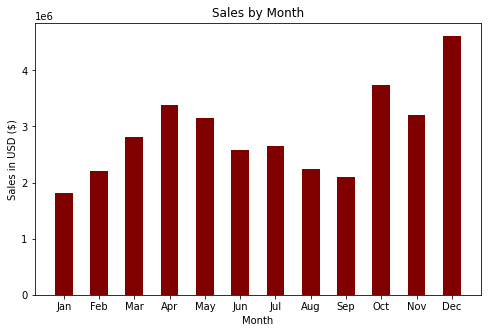

In [51]:
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(months, result_month, color ='maroon',
        width = 0.5)
 
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.title("Sales by Month")
plt.show()

fig.savefig(image_path + 'Sales by Month.png')

#The y axis is in scientific notation (1e6)
#As we can see, December was the best month with more than 4 million dollars in sales.

#### Getting the city names for each sale to know which city purchased the most.

In [25]:
#Getting the city and states names. Using apply method for each cell in the column 'Purchase Address'

def get_city(adress):
    city_name = adress.split(',')[1]
    return city_name

def get_state(adress):
    state_name = adress.split(',')[2].strip()[:2] #getting only the 2 first elements. Ex: TX
    return state_name

#Adding the new columns and apply the functions defined above,
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA)
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA)
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA)


In [26]:
result_per_city = df.groupby('City').sum()
result_per_city #Notice there are Portland in ME and OR states

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


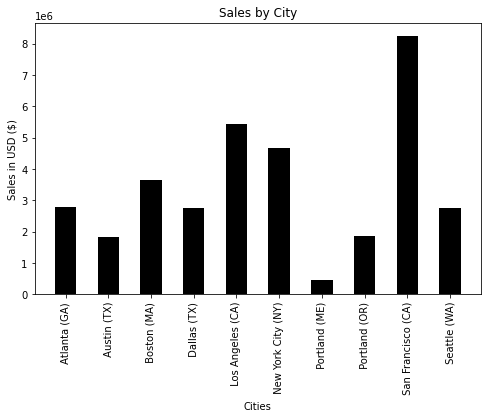

In [52]:
#Taking the cities names for x axis from the index of result_per_city
cities = result_per_city.index

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(cities, result_per_city['Sales'], color ='black',
        width = 0.5)

plt.xticks(cities, rotation = 'vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in USD ($)")
plt.title("Sales by City")
plt.show()

fig.savefig(image_path + 'Sales by City.png')

#Sao Francisco is the highest purchasing city.

#### Getting the purchase's time of all cities in order to make some decision.

In [28]:
df['Order Hour'] = pd.DatetimeIndex(df['Order Date']).hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [29]:
#Counting the frequency of a purchase per each hour.

results_per_hour = df.groupby('Order Hour').count()
results_per_hour.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854


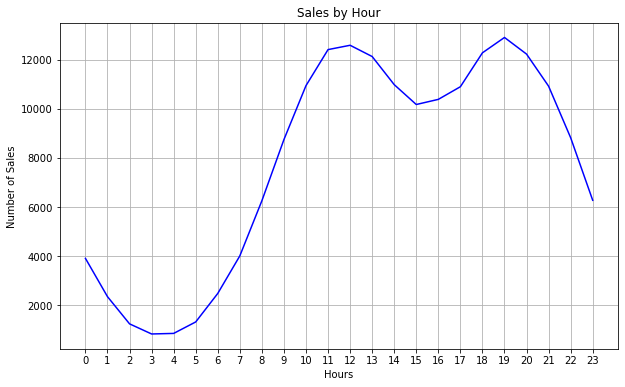

In [54]:
#Taking the hours for x axis from the index of results_by_hour
hours = results_per_hour.index

fig = plt.figure(figsize = (10, 6))
 
# creating the line chart
plt.plot(hours, results_per_hour['Quantity Ordered'], color ='blue')

plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of Sales")
plt.title("Sales by Hour")
plt.show()

fig.savefig(image_path + 'Sales by Hour.png')

#As we can see, it shows 2 peaks at the data at 11 (11 AM) and 19 (7 PM).

#### Evaluating the analysis to each city.

In [31]:
results_per_hour_per_city = df.groupby(['City' , 'Order Hour']).count()
results_per_hour_per_city

Order ID  Product  Quantity Ordered  Price Each  \
City          Order Hour                                                    
 Atlanta (GA) 0                310      310               310         310   
              1                213      213               213         213   
              2                113      113               113         113   
              3                 57       57                57          57   
              4                 80       80                80          80   
...                            ...      ...               ...         ...   
 Seattle (WA) 19               989      989               989         989   
              20               988      988               988         988   
              21               869      869               869         869   
              22               693      693               693         693   
              23               551      551               551         551   

                          Order Date  Purchase Address  Month  Sales  
City          Order Hour                                              
 Atlanta (GA) 0                  310               310    310    310  
              1                  213               213    213    213  
              2                  113               113    113    113  
              3                   57                57     57     57  
              4                   80                80     80     80  
...                              ...               ...    ...    ...  
 Seattle (WA) 19                 989               989    989    989  
              20                 988               988    988    988  
              21                 869               869    869    869  
              22                 693               693    693    693  
              23                 551               551    551    551  

[240 rows x 8 columns]

In [57]:
def hours_distribution_cities(all_cities):
    for city in all_cities:
        #Get the values of city: results_per_hour_per_city.index.get_level_values('City')
        results_per_hour_city = results_per_hour_per_city.loc[results_per_hour_per_city.index.get_level_values('City') == city]

        fig = plt.figure(figsize = (12, 5))

        # creating the line chart
        plt.plot(hours, results_per_hour_city, color ='blue')

        plt.xticks(hours)
        plt.grid()
        plt.xlabel("Hours")
        plt.ylabel(f"Number of Sales in{city}")
        plt.title("Sales by Hour")
        plt.show()
        
        fig.savefig(image_path + f"Sales by Hour in{city}")

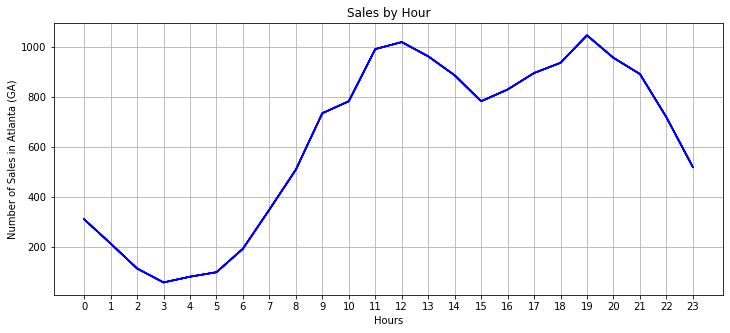

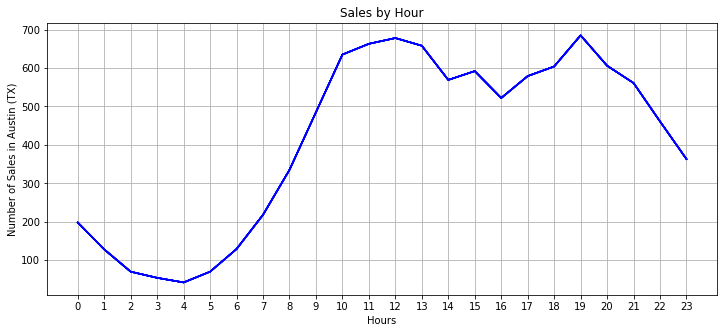

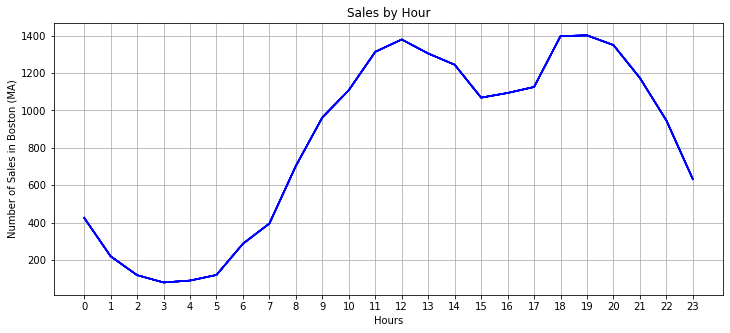

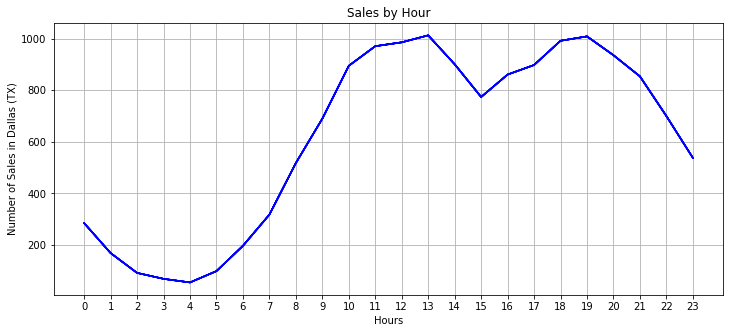

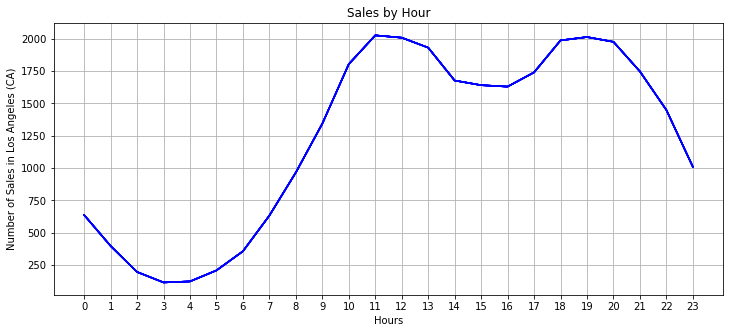

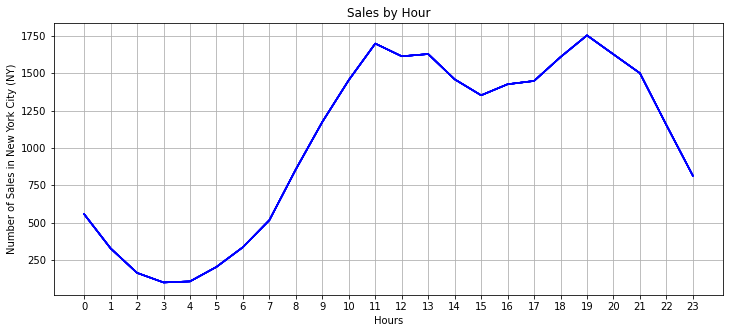

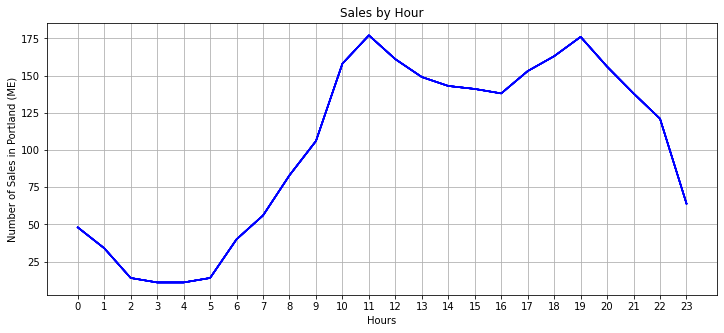

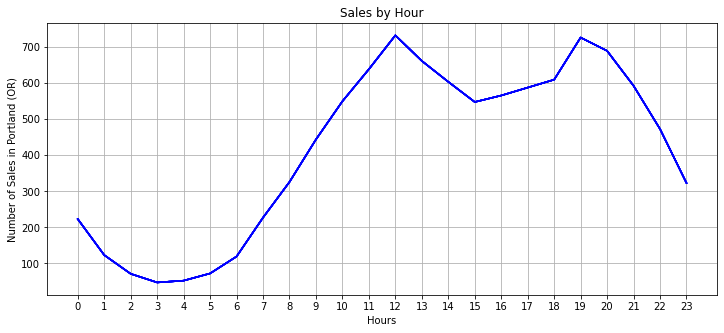

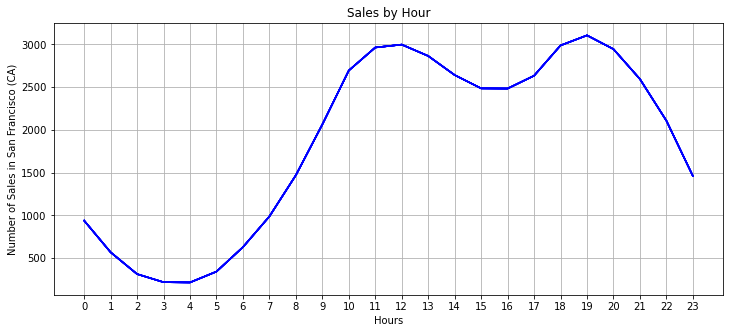

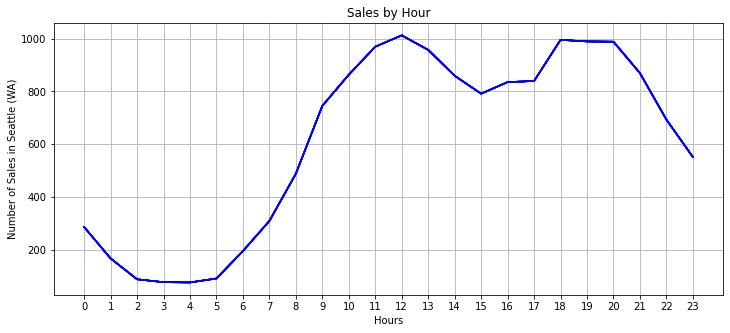

In [58]:
#As we have multiindex, we have to grab the desire city for analysis.

all_cities = results_per_hour_per_city.index.get_level_values('City').unique()
hours_distribution_cities(all_cities)

#### The peaks for some cities are slightly different from the general analysis.
#### Therefore, if the goal is to display advertisements in a certain time to maximize the likelihood of customer’s buying product, it is possible to plan the advertisement better for the specific city.
#### For example, Seattle (WA) has a peak at 18 (6 PM), so it could be better to display advertisements for that public a little bit earlier from 6 PM.

#### Checking the most sold products

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [35]:
quantity_ordered = df.groupby('Product')['Quantity Ordered'].sum()
quantity_ordered.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

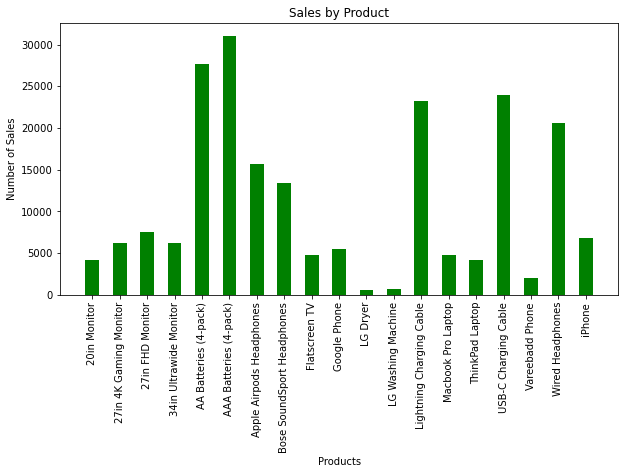

In [59]:
#Taking the products names for x axis from the index of quantity_ordered
product = quantity_ordered.index

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(product, quantity_ordered, color ='green',
        width = 0.5)

plt.xticks(product, rotation = 'vertical')
plt.xlabel("Products")
plt.ylabel("Number of Sales")
plt.title("Sales by Product")
plt.show()

fig.savefig(image_path + 'Sales by Product.png')

#### The most sold products are basically accesories, such as bateries, USB cable and so on, which are products that need to be replaced more frequently than other products. Additionally, the costs of them might get an influence as well.

In [38]:
#Getting the price from each product. Mean defined because it will return the exactly price.

prices = df.groupby('Product')['Price Each'].mean()

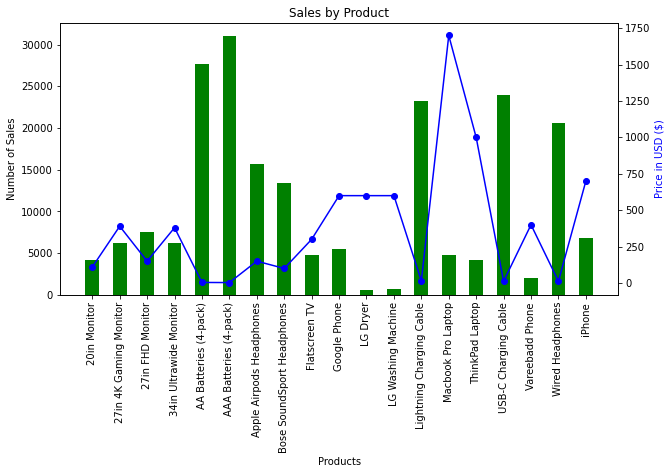

In [60]:
# Overlaying the graph by their actual price of each product.

# create figure and axis objects with subplots()
fig, ax1 = plt.subplots(figsize = (10, 5))

# make a plot
ax1.bar(product, quantity_ordered, color ='green', width = 0.5)

# set x-axis label
ax1.set_xlabel("Products")
ax1.set_xticklabels(product, rotation = 'vertical')

# set y-axis label
ax1.set_ylabel("Number of Sales")

ax1.set_title("Sales by Product")

# twin object for two different y-axis on the sample plot
ax2 = ax1.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(product, prices, color="blue", marker="o")
ax2.set_ylabel("Price in USD ($)", color="blue")

plt.show()

fig.savefig(image_path + 'Sales by Product and Price.png')

#### There is some correlationship as the most sold products have low prices. However, for instance, Macbook is more expensive than LG washing machine because there is more demand for this kind of product.

#### Evaluating the orders which have more than 1 purchase to see the products which are most sold together.

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [42]:
#Taking all the orders which appears more than once.
#Keep=False because we want to keep with all duplicated values.

orders = df[df.duplicated(['Order ID'], keep=False)]
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11


In [43]:
# Creating a new column with all the names of the products for the same order

def grouping_producs(product):
    sep = ','
    products_grouped = sep.join(product)
    return products_grouped

orders['Products Grouped'] = orders.groupby('Order ID')['Product'].transform(lambda x: grouping_producs(x))

In [44]:
#Now dropping the duplicates and just keeping the first occurancy.

orders = orders.drop_duplicates(subset='Order ID', keep="first")

In [45]:
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Products Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
#Counting each time the pair of products repeats.

from itertools import combinations
from collections import Counter

def get_commum_products_bought_together(number_products):
    count = Counter()

    for row in orders['Products Grouped']:
        row_list = row.split(',') #for the first row (Google Phone,Wired Headphones), returns ['Google Phone', 'Wired Headphones']
        count.update(Counter(combinations(row_list, number_products))) #if set 2, it will return the 2 products which are most bought together in one order.

    most_comum_product = []
    number_orders = []

    for key, value in count.most_common(5):
        most_comum_product.append(key)
        number_orders.append(value)
    return most_comum_product, number_orders

In [47]:
#Storing those variables to a dataframe to visualize it.

most_comum_product, number_orders = get_commum_products_bought_together(2)
data = {'Products': most_comum_product,'Quantity Ordered' : number_orders}

df_products = pd.DataFrame(data)
df_products.head()

,Products,Quantity Ordered
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361


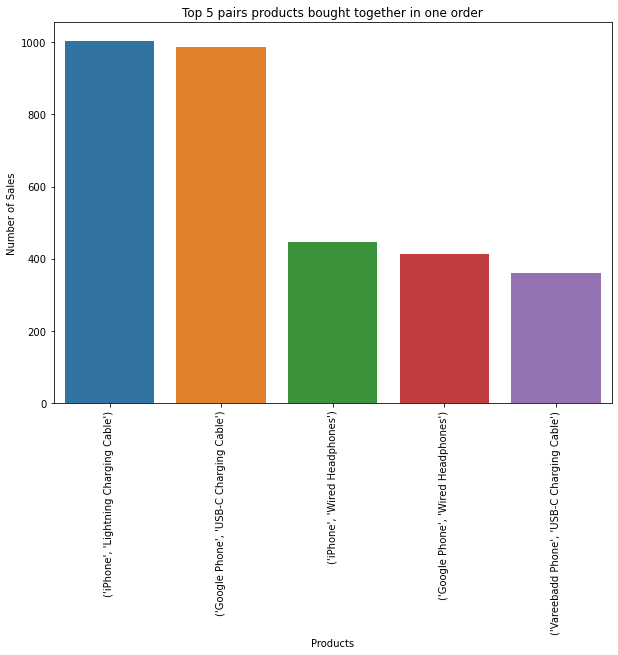

In [61]:
#Creating the bar plot

fig = plt.figure(figsize = (10, 7))

sns.barplot(x = 'Products', y = 'Quantity Ordered', data = df_products)
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Sales')
plt.title("Top 5 pairs products bought together in one order")

plt.show()

fig.savefig(image_path + 'Top 5 pairs products bought together in one order.png')

#### The 2 most products bought together in one order was iPhone and Lightning Charging Cable

In [76]:
#Saving this df into the directory to create a dashboard.

df.to_csv(file_path + 'All_sales.csv')